# Laboratorio Estadística Computacional 3

    - Pablo Mera K. 201773028-5
    - Paula Pérez M. 201603022-0
    - Anghelo Carvajal C. 201473062-4

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
from scipy.integrate import quad
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


## Sección 2: Distribuciones Discretas.

#### 1. Explique porqué es posible aproximar una distribución discreta con una continua.
<!--
Blah blah blah

<!--Logica sofia: Si tienes una, emm, distribucion discreta, que se define como una sumatoria con particiones P, si las sumatorias P tienden a infinito, entonces la weaita se acerca a una integral, las cuales se aproximan a algo que no alcance a anotar :c-->


Cuando se tiene una distribución discreta con un tamaño de muestras `n`, cuando n se lleva al infinito esta puede adquirir la forma de una distribución continua.

Esto es similar a lo que ocurre con la definición de integral, cuando se tiene la sumatoria de infinitas particiones muy pequeñas, esta se puede tomar como una función continua, similar a lo que ocurre con sumas de Riemann.

#### 2. Demuestre como estas aproximaciones se cumplen, generando muestras de la distribución binomial con parámetros fíjos, y comparando los histogramas de las muestras con las respectivas funciones teóricas.


In [177]:
def plotear_histograma(n, p, a, titulo='Histograma', x_label = 'valores', y_label = 'frequencia'):
    if n >= 30:
        if p < 0.1:
            dist = stats.poisson(n*p)
            rvs = dist.rvs(a)
            X = np.arange(min(rvs), max(rvs))
            p_f = dist.pmf(X)
        elif 0.1 <= p and p <= 0.9:
            mu = n*p
            variance = n*p*(1-p)

            dist = stats.norm(mu, variance)
            rvs = dist.rvs(a)
            X = np.linspace(min(rvs), max(rvs))
            p_f = dist.pdf(X)
        else:
            dist = stats.poisson(n*(1-p))
            rvs = dist.rvs(a)
            X = np.arange(min(rvs), max(rvs))
            p_f = dist.pmf(X)
    else:
        dist = stats.binom(n, p)
        rvs = dist.rvs(a)
        X = np.arange(min(rvs), max(rvs))
        p_f = dist.pmf(X)

    plt.hist(rvs, density=True)
    plt.plot(X, p_f)

    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(titulo)
    plt.show()

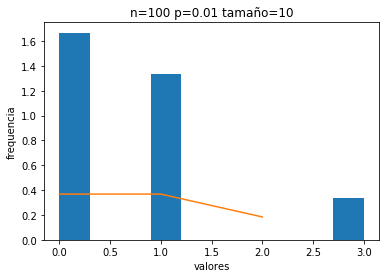

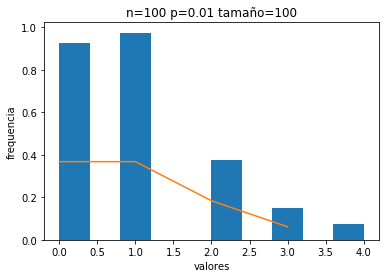

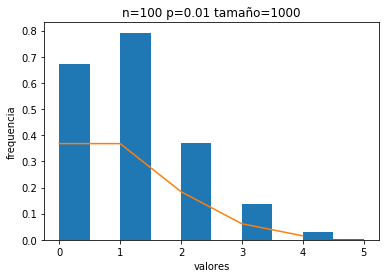

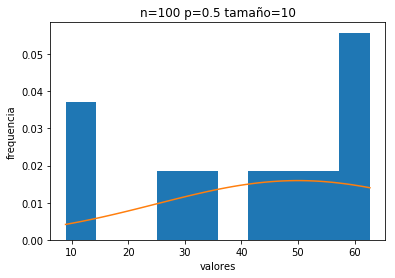

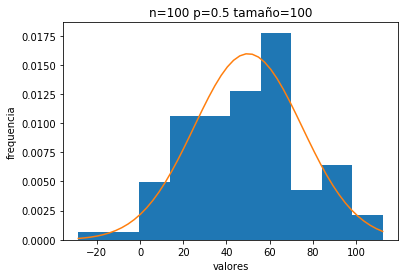

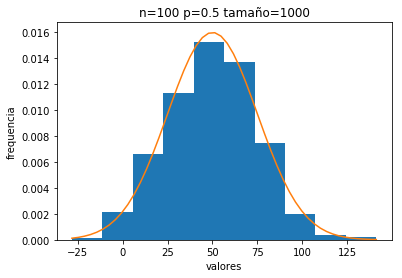

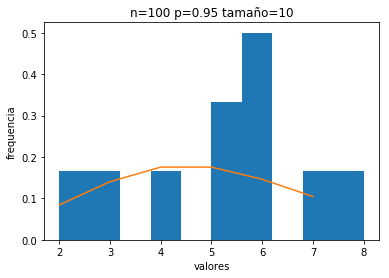

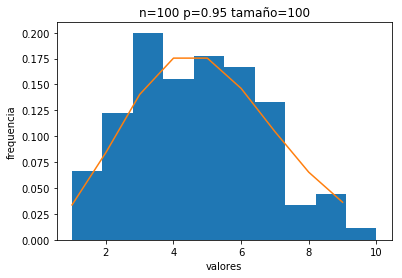

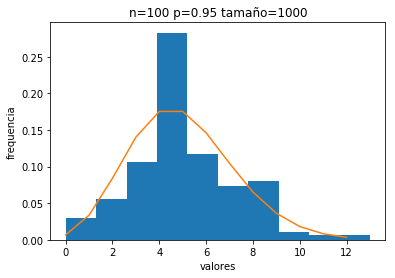

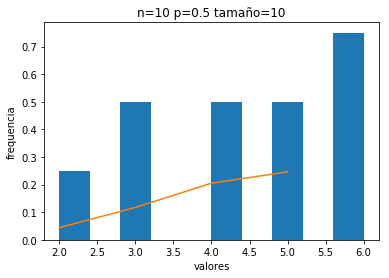

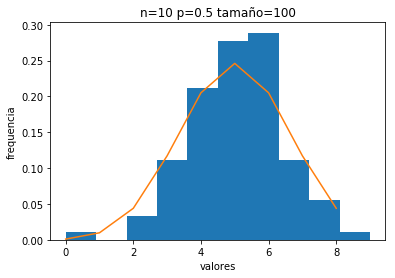

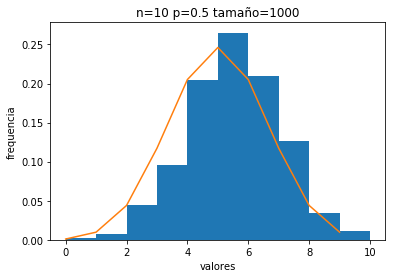

In [178]:
n_p = [(100, 0.01), (100, 0.5), (100, 0.95), (10, 0.5)]
for n, p in n_p:
    for tamano in [10, 100, 1000]:
        plotear_histograma(n, p, tamano, titulo="n="+str(n)+" p="+str(p) + " tamaño="+str(tamano))


#### 3. ¿Tiene relación el parámetro n con el error de aproximación? Muestre con un gráfico como varía el error de aproximación, para p fíjo, incrementando el valor de n.


In [4]:
def error(n, p, a):
    dist = stats.binom(n, p)
    real = dist.pmf(a)
    
    if n >= 30:
        if p < 0.1:
            dist = stats.poisson(n*p)
            p_f = dist.pmf(a)
        elif 0.1 <= p and p <= 0.9:
            mu = n*p
            variance = n*p*(1-p)

            dist = stats.norm(mu, variance)
            p_f = dist.pdf(a)
        else:
            dist = stats.poisson(n*(1-p))
            p_f = dist.pmf(a)
    else:
        dist = stats.binom(n, p)
        p_f = dist.pmf(a)

    return np.absolute(p_f - real)

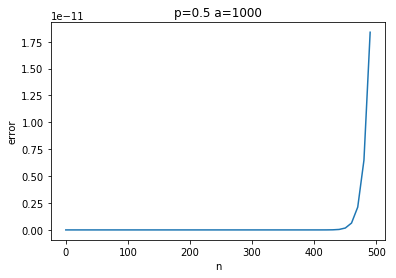

In [5]:
a = 1000
p = 0.5
titulo="p="+str(p) + " a="+str(a)
x_label = 'n'
y_label = 'error'

valores_n = range(0, 500, 10)
errores = [error(n, p, a) for n in valores_n]

plt.plot(valores_n, errores)

plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title(titulo)
plt.show()

Viendo el grafico, podemos concluir que el valor de `n` no influye en las aproximaciones, esto es debido a que el error es muy pequeño, siendo este del orden de $10^{-11}$.

## Sección 3: Distribuciones Continuas.

#### 1. Explique porqué la distribución Gamma serviría en este caso.

Dado las especificaciones del problema, la distribucion que mas mejor se acopla es la distribucion Gamma, dado que esta es la unica distribución que cumple con las condiciones planteadas. La normal, como contraparte, tambien contempla valores negativos y positivos, cosa que no cumple las restricciones.


#### 2. Genere datos provenientes de la distribución, para una media igual a 12, y varianza igual a 36. Aumente iterativamente la cantidad de datos generados hasta que el error de la media real vs muestral sea menor que $10^{-3}$. Grafíque como varía el error vs el tamaño de la muestra generada.

In [351]:
def calcular_error_gamma(media=12, var=36):
    shape, scale = media*media/var, var/media # mean and dispersion (lo dejé como alfa y beta)
    n = 1
    lista_n = [n]
    s = np.random.gamma(shape, scale, n)
    error = media-(sum(s)/len(s))
    lista_errores = [error]
    while 1e-3 <= error:
        n += 1
        lista_n.append(n)
        s = np.random.gamma(shape, scale, n)
        error = np.absolute(media-(sum(s)/len(s)))
        lista_errores.append(error)
    return lista_n, lista_errores

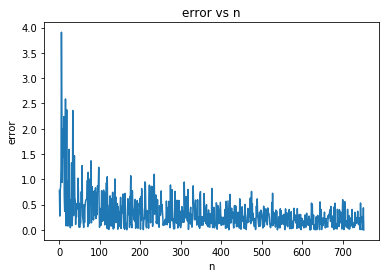

In [356]:
x, y = calcular_error_gamma()
plt.plot(x, y)
plt.ylabel("error")
plt.xlabel("n")
plt.title("error vs n")
plt.show()

#### 3. Diseñe y ejecute un procedimiento iterativo, el cual le permita encontrar el valor del parámetro shape bajo el cual la probabilidad de obtener un dato menor a 12 sea 0.4, con un error menor a $10^{-3}$. Mantenga el otro parámetro de la pregunta anterior. Grafíque como varia el error a medida que se llega al valor del parámetro.

In [8]:
def gamma(shape):
    return quad(lambda x: x**(shape-1) * math.e**(-x), 0, np.inf)[0]

def low_inc_gamma(s, x):
    return quad(lambda t: t**(s-1) * math.e**(-t), 0, x )[0]

def CDF(x, shape, scale):
    return low_inc_gamma(shape, x/scale) / gamma(shape)

def error_gamma_scale():
    shape = 1
    scale = 3
    probabilidad = 1
    error = 1

    x =[]
    y = []

    while(error > 10**-3):
        shape += 0.0001
        probabilidad = CDF(12, shape, scale)
        error = abs(0.4 - probabilidad)

        x.append(shape)
        y.append(error)
    
    return x, y, shape

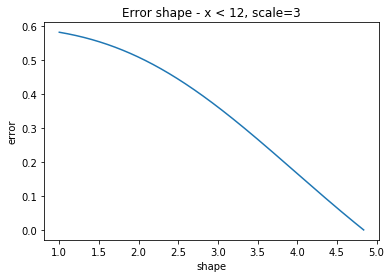

El valor final de shape es k = 4.8375


In [9]:
plt.title('Error shape - x < 12, scale=3')
x, y, shape = error_gamma_scale()
plt.plot(x, y)
plt.xlabel('shape')
plt.ylabel('error')
plt.show()  

print("El valor final de shape es k = " + str(round(shape,4)))

## Sección 4: Distribuciones Multivariadas.

#### 1. Obtenga 3 muestras normales bivariadas de tamaño 10000 y grafiquelas.

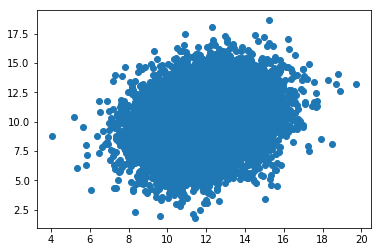

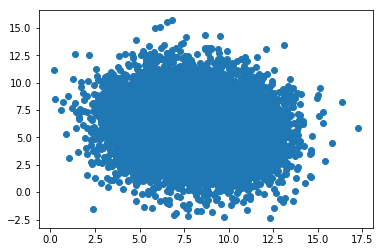

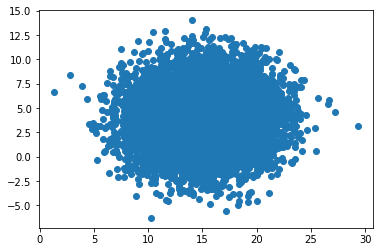

In [11]:
def rotate(xy, radians):
    """Only rotate a point around the origin (0, 0)."""
    x, y = xy
    xx = x * np.cos(radians) + y * np.sin(radians)
    yy = -x * np.sin(radians) + y * np.cos(radians)

    return xx, yy

x1,y1 = np.random.multivariate_normal([12,10],[[3,0.9],[0.9,5]], 10000).T
x2,y2 = np.random.multivariate_normal([8,6],[[5,-0.7],[-0.7,6]], 10000).T
x3,y3 = np.random.multivariate_normal([15,4],[[10,0.2],[0.2,7]], 10000).T


plt.plot(x1, y1, 'o')
plt.show()
plt.plot(x2, y2, 'o')
plt.show()
plt.plot(x3, y3, 'o')
plt.show()


#### 2. Agregue al gráfico las siguientes zonas:

 - Para cada muestra $X_i$, una elipse con centro $\mu_i$ y radios $\theta_{i,1}$ y $\theta_{i,2}$, y angulo proporcional a la covarianza.
 - Para cada muestra $X_i$, una elipse con centro $\mu_i$ y radios $2\theta_{i,1}$ y $2\theta_{i,2}$, y angulo proporcional a la covarianza.
 
Usando los valores obtenidos en la pregunta anterior, calcule el porcentaje de datos de cada muestraque se encuentre al interior de las elipses. ¿Como puede interpretar esta proporcion de área?

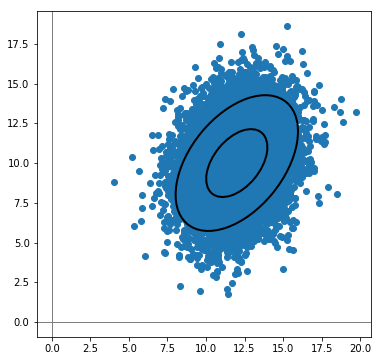

Porcentaje X1 en sigma:85.22999999999999%


In [29]:
fig, ax1 = plt.subplots(figsize=(6, 6))

ax1.scatter(x1,y1)

ax1.axvline(c='grey', lw=1)
ax1.axhline(c='grey', lw=1)



elipse11 = Ellipse((12, 10), 3,5,
                     angle=-40.5, linewidth=2, fill=False, zorder=2)
elipse12 = Ellipse((12, 10), 6,10,
                     angle=-40.5, linewidth=2, fill=False, zorder=2)

ax1.add_patch(elipse11)
ax1.add_patch(elipse12)
plt.show()


c=0
i=0
while i<10000: 
    x = x1[i] - 12
    y = y1[i] - 10    
    xy=rotate([x,y],-np.pi*9/40)
    if (((xy[0])**2)/9 + ((xy[1])**2)/25) <= 1:
        c+=1
    i+=1
    
print ("Porcentaje X1 en sigma:" + str(c/10000 *100 )+"%")


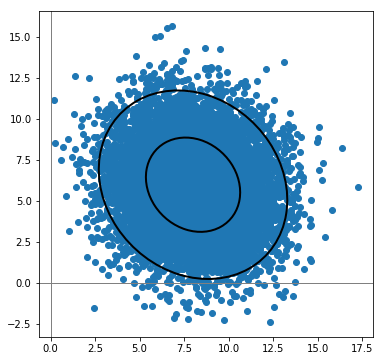

Porcentaje X2 en sigma:94.13%


In [30]:

fig, ax2 = plt.subplots(figsize=(6, 6))

ax2.scatter(x2,y2)

ax2.axvline(c='grey', lw=1)
ax2.axhline(c='grey', lw=1)



elipse21 = Ellipse((8, 6), 5,6,
                     angle=31.5, linewidth=2, fill=False, zorder=2)
elipse22 = Ellipse((8, 6), 10,12,
                     angle=31.5, linewidth=2, fill=False, zorder=2)

ax2.add_patch(elipse21)
ax2.add_patch(elipse22)
plt.show()


c=0
i=0
while i<10000: 
    x = x2[i] - 8
    y = y2[i] - 6    
    xy=rotate([x,y],np.pi*7/40)
    if (((xy[0])**2)/25 + ((xy[1])**2)/36) <= 1:
        c+=1
    i+=1
    
print ("Porcentaje X2 en sigma:" + str(c/10000 *100 )+"%")


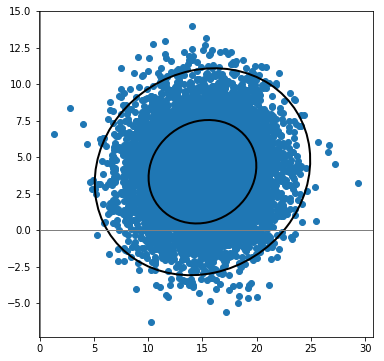

Porcentaje X3 en sigma:98.1%


In [31]:

fig, ax3 = plt.subplots(figsize=(6, 6))

ax3.scatter(x3,y3)

ax3.axvline(c='grey', lw=1)
ax3.axhline(c='grey', lw=1)



elipse31 = Ellipse((15, 4), 10,7,
                     angle=9, linewidth=2, fill=False, zorder=2)
elipse32 = Ellipse((15, 4), 20,14,
                     angle=9, linewidth=2, fill=False, zorder=2)

ax3.add_patch(elipse31)
ax3.add_patch(elipse32)
plt.show()


c=0
i=0
while i<10000: 
    x = x3[i] - 15
    y = y3[i] - 4    
    xy=rotate([x,y],-np.pi/20)
    if (((xy[0])**2)/100 + ((xy[1])**2)/49) <= 1:
        c+=1
    i+=1
    
print ("Porcentaje X3 en sigma:" + str(c/10000 *100 )+"%")



La elipse $\sigma$ representa la seccion roja.

La elipse $2\sigma$ representa la seccion roja mas azul.

<img src="Empirical-Rule.png">

#### 3. ¿Qué tan buena es la clasificación de las muestras con estas fronteras? Obtenga la matriz de confusión para cada frontera con los datos muestreados.

In [19]:
i=0
l1=[]
l2=[]
while i<10000: 
    if x2[i] < -3/2 * x1[i] +23:
        l1.append('x2')
    elif x3[i] < -3/2 * x1[i] +23:
        l1.append('x3')
    else:l1.append('x1')
    
    l2.append('x1')
    
    if x2[i] < -3/2 * x1[i] +23:
        l1.append('x1')
    elif x3[i] < 4/3 * x2[i] -28/3:
        l1.append('x3')  
    else:l1.append('x2')
    
    l2.append('x2')
    
    if x3[i] < 4/3 * x2[i] -28/3:
         l1.append('x2')
    elif x3[i] < -3/2 * x1[i] +23:
         l1.append('x1')
    else: l1.append('x3')
    
    l2.append('x3')
    i+=1

print("Matriz de confusion:\n",confusion_matrix(l2, l1, labels=["x1", "x2", "x3"]))

Matriz de confusion:
 [[8040 1938   22]
 [1938 8059    3]
 [  70    3 9927]]


#### 4. ¿Cuál  es  la  probabilidad  de  que  un  dato  de  una  muestra  sea  clasificado  en  otra  muestra?  Obtenga este valor de forma empírica.

In [32]:
a =confusion_matrix(l2, l1, labels=["x1", "x2", "x3"])

proberror = (1 - a[0][0]/10000 + 1 - a[1][1]/10000  +1  - a[2][2]/10000)/3 * 100

print("El valor pedido es:",proberror)

El valor pedido es: 13.246666666666663


## Sección 5: Conclusiones.

 - La funcion binomial se puede aproximar de forma optima usando la distribución normal y la distribución de Poisson. En general, es posible  aproximar funciones discretas con funciones continuas.
 - Es fundamental tener restricciones para encontrar la aproximación a una distribución de la forma mas adecuada.
 - En un plano en $XY$ con muchas muestras aleatorias y distintas dispersiones para un grupo determinado de muestras, se puede estimar a qué dispersión puede corresponder una nueva muestra.